In [28]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset
customer = pd.read_csv(r"C:\Users\arnuv\Downloads\archive (1)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


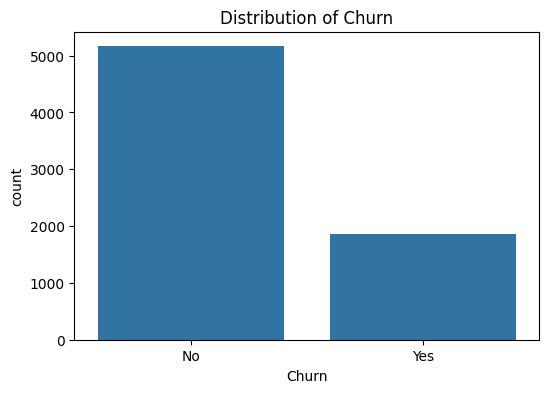

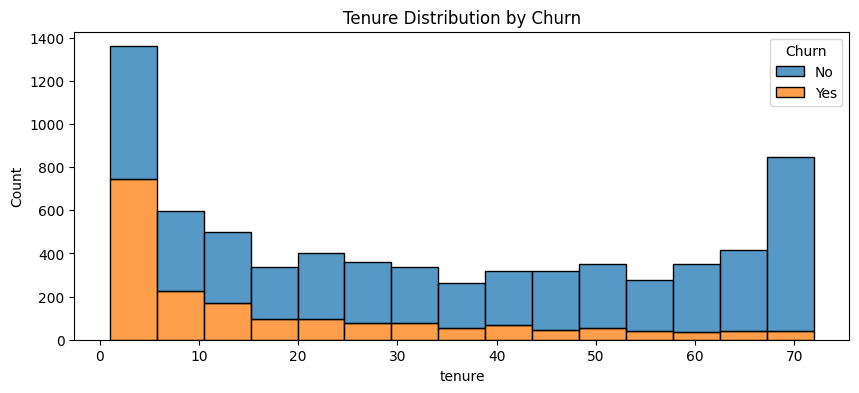

In [32]:
# dropping customer ID and fixing data
customer.drop('customerID', axis=1, inplace=True, errors = 'ignore')

# Some rows have " " intead of numbers so i'm forcing them to numeric, turning the errors into NaN
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors = 'coerce')

# Dropping the rows with missing TotalCharges
customer.dropna(inplace=True)

# visualization of the target (Churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=customer)
plt.title('Distribution of Churn')
plt.show()

# visulization of numerical features
plt.figure(figsize=(10,4))
sns.histplot(x='tenure', hue='Churn', data=customer, multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

In [37]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

cat_cols = [c for c in customer.columns if customer[c].dtype == 'object' and c != 'Churn']

customer_encoded = pd.get_dummies(customer, columns=cat_cols, drop_first=True)
print(type(customer_encoded))
# encoding the target to yes = 1 and no = 0
le = LabelEncoder()
customer_encoded['Churn'] = le.fit_transform(customer_encoded['Churn'])
print(type(customer_encoded))
#scaling numerical data

cols_to_scal = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
customer_encoded[cols_to_scal] = scaler.fit_transform(customer_encoded[cols_to_scal])

#splitting data
X = customer_encoded.drop('Churn', axis = 1)
y = customer_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training features shape: ", X_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Training features shape:  (5625, 30)


In [52]:
import tensorflow as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([layers.Dense(20, activation = 'relu', input_shape = (X_train.shape[1],)), layers.Dense(10, activation = 'relu'), layers.Dense(1, activation = 'sigmoid')])

#compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

                          

Epoch 1/50


C:\Users\arnuv\anaconda3\envs\my-environment\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6904 - loss: 0.5486 - val_accuracy: 0.7253 - val_loss: 0.4783
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.4600 - val_accuracy: 0.7929 - val_loss: 0.4325
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4381 - val_accuracy: 0.8044 - val_loss: 0.4166
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4287 - val_accuracy: 0.8044 - val_loss: 0.4088
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4238 - val_accuracy: 0.8169 - val_loss: 0.4056
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4213 - val_accuracy: 0.8116 - val_loss: 0.4053
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4183 - val_accuracy: 0.8151 - val_loss: 0.4026
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4170 - val_accuracy: 0.8160 - val_

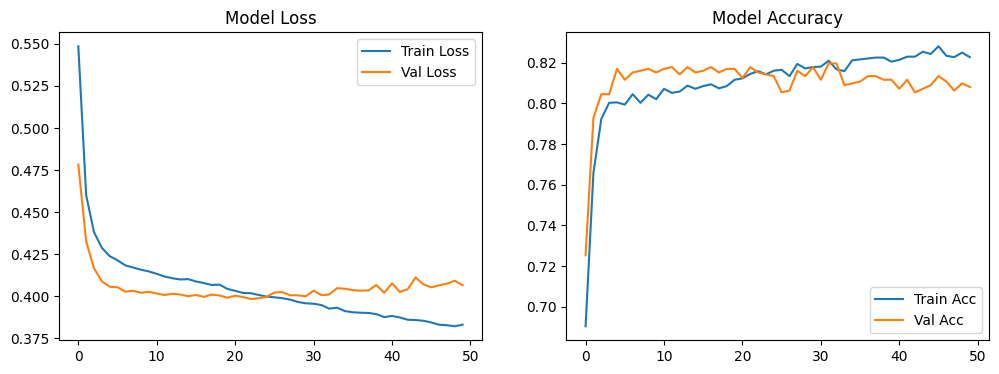

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


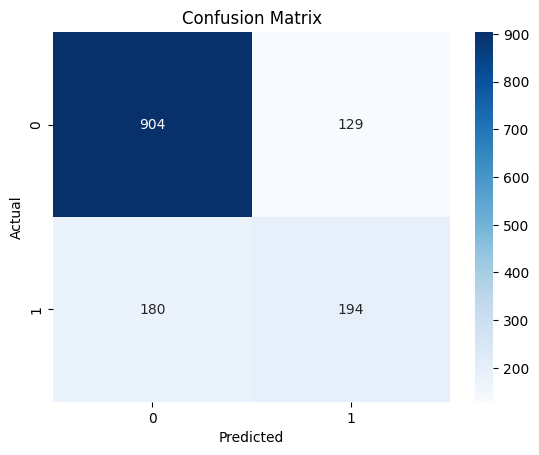

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Plot Training History (Loss and Accuracy)
# This satisfies the requirement for plots and diagrams
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# 2. Predictions
y_pred = model.predict(X_test)
# Convert probabilities to binary (0 or 1)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

# 3. Confusion Matrix & Report
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_binary))

In [41]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   -- ------------------------------------ 20.4/332.0 MB 102.9 MB/s eta 0:00:04
   ---- ----------------------------------- 38.3/332.0 MB 92.8 MB/s eta 0:00:04
   ------- -------------------------------- 59.8/332.0 MB 97.0 MB/s eta 0:00:03
   --------- ------------------------------ 82.1/332.0 MB 98.9 MB/s eta 0:00:03
   ------------ ------------------------- 106.2/332.0 MB 102.7 MB/s eta 0:00:03
   -------------- ----------------------- 126.9/332.0 MB 101.5 MB/s eta 0:00:03
   ---------------- ---------------------- 143.4/332.0 MB 97.8 MB/s eta 0:00:02
   ------------------ -------------------- 159.1/332.0 MB 95.6 MB/s eta 0:00:02
   -------------------- ------------------ 176.9/332.0 MB 94.6 MB/s eta 0:00:02
   ---------------------- ---------------- 195.0/332.0 MB 93.6 MB/s eta 0:00:02
   ------------------------- ------------- 219.9/332.0 MB 95.6 MB/s eta 0:00:02
   ---------------------------- ---------- 243.5/